In [12]:
import numpy as np
import pandas as pd
from osgeo import gdal
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import matplotlib
import pandas as pd
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

#绘图前的基本设置

myfont = fm.FontProperties(fname=r'C:\Windows\Fonts\Times New Roman.tiff') # 设置字体

# 设置matplotlib正常显示中文和负号

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
# matplotlib.rcParams['font.sans-serif']=['NSimSun']   # 用黑体显示中文
# matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号
matplotlib.rcParams['font.size'] = 17.5
# matplotlib.rcParams['font.family'] = 'sans-serif'  
matplotlib.rcParams['font.sans-serif'] = 'Times New Roman'  # NSimSun 新宋体字体   宋体：SimSuncss


In [2]:
os.chdir(r'E:\BaiduSyncdisk\Futureheatwave\data\trend\interpolation')   #台式机

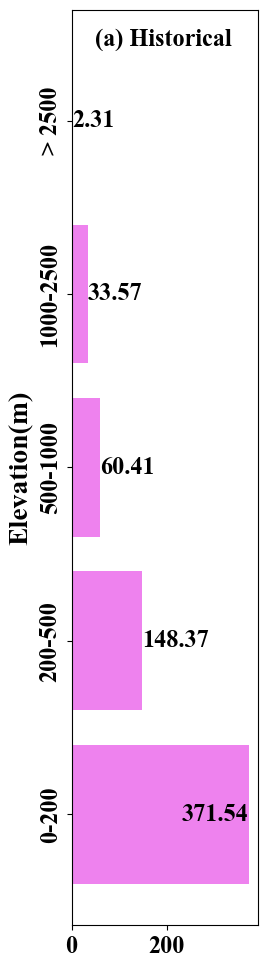

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('mean_TM_historical_2001_2020_age_exposure-dem.csv')

# Plot the data
plt.figure(figsize=(3, 10))  # optional, to adjust the size of the plot
bars = plt.barh(df['elevation_range'], df['mean_exposure'],color='violet')  # barh is used for horizontal bar plot

# Set the labels and title
plt.ylabel('Elevation(m)', fontsize=20)

# Rotate and align y-axis labels
plt.yticks(rotation='vertical', va='center')  # 'vertical' or 90

# Loop over the bars, and add a label to each
for i, bar in enumerate(bars):
    width = bar.get_width()
    
    # Modify the x location for the first bar
    if i == 0:
        x_loc = width - 0.05  # Modify this value to fit the label within the bar
        align = 'right'
    else:
        x_loc = width
        align = 'left'
    
    plt.text(x_loc,  # X location of text
             bar.get_y() + bar.get_height() / 2,  # Y location of text
             f'{width:.2f}',  # The label text (formatted to 2 decimal places)
             va='center',  # Center the label vertically
             ha=align)  # Align the label to the left or right

# Show the plot
plt.text(0.86,0.98, "(a) Historical", transform=plt.gca().transAxes, ha='right', va='top')
# Adjust layout to make sure everything fits in the figure
plt.tight_layout()
plt.savefig('010dem.png', dpi=400)
plt.show()


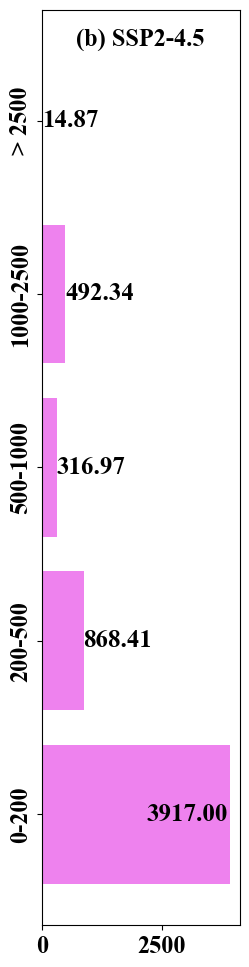

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('mean_TM_SSP245_2041_2100_age_exposure-dem.csv')

# Convert 'mean_exposure' to numeric, removing commas if present
df['mean_exposure'] = df['mean_exposure'].str.replace(',', '').astype(float)

# Plot the data
plt.figure(figsize=(3, 10))  # optional, to adjust the size of the plot
bars = plt.barh(df['elevation_range'], df['mean_exposure'], color='violet')  # barh is used for horizontal bar plot

# Set the labels and title
# plt.xlabel('Mean Exposure', fontsize=14)
# plt.ylabel('Elevation (m)', fontsize=14)

# Rotate and align y-axis labels
plt.yticks(rotation='vertical', va='center')  # 'vertical' or 90

# Loop over the bars, and add a label to each
for i, bar in enumerate(bars):
    width = bar.get_width()
    
    # Modify the x location for the first bar
    if i == 0:
        x_loc = width - 50  # Modify this value to fit the label within the bar
        align = 'right'
    else:
        x_loc = width
        align = 'left'
    
    plt.text(x_loc,  # X location of text
             bar.get_y() + bar.get_height() / 2,  # Y location of text
             f'{width:.2f}',  # The label text (formatted to 2 decimal places)
             va='center',  # Center the label vertically
             ha=align,     # Align the label to the left or right
             fontsize=18)  # Font size

# Add subplot text
plt.text(0.82, 0.98, "(b) SSP2-4.5", transform=plt.gca().transAxes, ha='right', va='top')

# Adjust layout to make sure everything fits in the figure
plt.tight_layout()
plt.savefig('020dem.png', dpi=400)
plt.show()


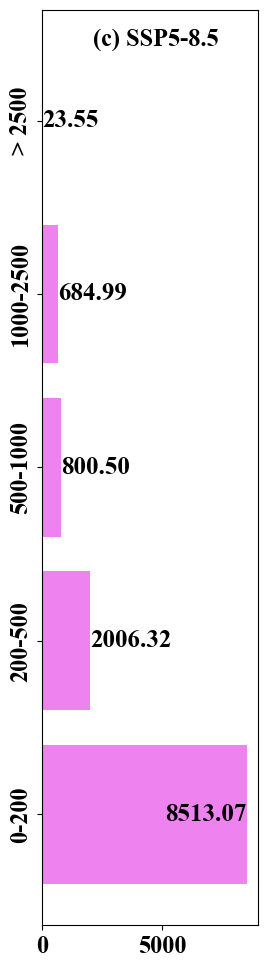

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('mean_TM_SSP585_2041_2100_age_exposure-dem.csv')

# Convert 'mean_exposure' to numeric, removing commas if present
df['mean_exposure'] = df['mean_exposure'].str.replace(',', '').astype(float)

# Plot the data
plt.figure(figsize=(3, 10))  # optional, to adjust the size of the plot
bars = plt.barh(df['elevation_range'], df['mean_exposure'], color='violet')  # barh is used for horizontal bar plot

# Set the labels and title
# plt.xlabel('Mean Exposure', fontsize=14)
# plt.ylabel('Elevation (m)', fontsize=14)

# Rotate and align y-axis labels
plt.yticks(rotation='vertical', va='center')  # 'vertical' or 90

# Loop over the bars, and add a label to each
for i, bar in enumerate(bars):
    width = bar.get_width()
    
    # Modify the x location for the first bar
    if i == 0:
        x_loc = width - 50  # Modify this value to fit the label within the bar
        align = 'right'
    else:
        x_loc = width
        align = 'left'
    
    plt.text(x_loc,  # X location of text
             bar.get_y() + bar.get_height() / 2,  # Y location of text
             f'{width:.2f}',  # The label text (formatted to 2 decimal places)
             va='center',  # Center the label vertically
             ha=align,     # Align the label to the left or right
             fontsize=18)  # Font size

# Add subplot text
plt.text(0.82, 0.98, "(c) SSP5-8.5", transform=plt.gca().transAxes, ha='right', va='top')

# Adjust layout to make sure everything fits in the figure
plt.tight_layout()
plt.savefig('030dem.png', dpi=400)
plt.show()


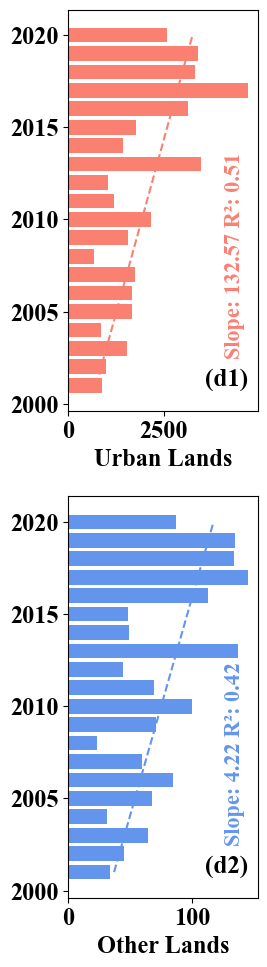

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('exposures_2001_to_2020.csv')

# Create a figure and two subplots (in two rows and one column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 10))

# Define a function to plot the data, regression line and statistics
def plot_data_and_regression(ax, x, y, color, xlabel):
    ax.barh(x, y, color=color)
    ax.set_xlabel(xlabel, fontsize=17.5)

    # Fit the data with a linear regression
    p = np.polyfit(x, y, 1)
    r = OLS(y, add_constant(x)).fit().rsquared

    # Plot the regression line with dashed linestyle
    ax.plot(np.polyval(p, x), x, color=color, linestyle='dashed')

    # Add text with the regression statistics
    ax.text(0.83, 0.13, f'Slope: {p[0]:.2f} R²: {r:.2f}',
            transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color=color, rotation='vertical')

# Plot the "Urban and Built-up Lands" data in the first subplot
plot_data_and_regression(ax1, df['Year'], df['Urban Lands'], 'salmon', 'Urban Lands')
ax1.text(0.95, 0.05, "(d1)", transform=ax1.transAxes, ha='right', va='bottom', fontsize=18)
ax1.set_yticks([2000, 2005, 2010, 2015, 2020])

# Plot the "Other Lands" data in the second subplot
plot_data_and_regression(ax2, df['Year'], df['Other Lands'], 'cornflowerblue', 'Other Lands')
ax2.text(0.95, 0.05, "(d2)", transform=ax2.transAxes, ha='right', va='bottom', fontsize=18)
ax2.set_yticks([2000, 2005, 2010, 2015, 2020])
plt.tight_layout()  # Adjust the layout so that plots do not overlap
plt.savefig('040lucc.png', dpi=400)
plt.show()


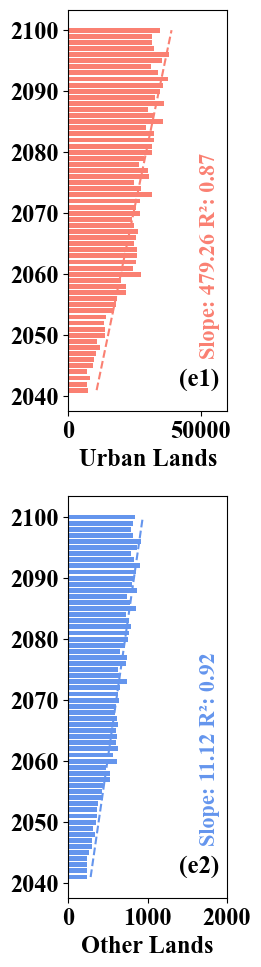

In [42]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('exposures_SSP245_2041_to_2100.csv')

# Create a figure and two subplots (in two rows and one column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 10))

# Define a function to plot the data, regression line and statistics
def plot_data_and_regression(ax, x, y, color, xlabel):
    ax.barh(x, y, color=color)
    ax.set_xlabel(xlabel, fontsize=17.5)

    # Fit the data with a linear regression
    p = np.polyfit(x, y, 1)
    r = OLS(y, add_constant(x)).fit().rsquared

    # Plot the regression line with dashed linestyle
    ax.plot(np.polyval(p, x), x, color=color, linestyle='dashed')

    # Add text with the regression statistics
    ax.text(0.83, 0.13, f'Slope: {p[0]:.2f} R²: {r:.2f}',
            transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color=color, rotation='vertical')
    
    # Adjust the horizontal axis to display values from 0 to 150,000 for ax1 and 0 to 3,000 for ax2
    ax1.set_xlim(0, 60000)
    ax2.set_xlim(0, 2000)

    # Set x-axis ticks to display only 2070, 2080, 2090, and 2100
    ax.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
    ax.set_yticklabels([2040, 2050, 2060, 2070, 2080, 2090, 2100])

# Plot the "Urban Lands" data in the first subplot
plot_data_and_regression(ax1, df['Year'], df['Urban Lands'], 'salmon', 'Urban Lands')
ax1.text(0.95, 0.05, "(e1)", transform=ax1.transAxes, ha='right', va='bottom', fontsize=18)

# Plot the "Other Lands" data in the second subplot
plot_data_and_regression(ax2, df['Year'], df['Other Lands'], 'cornflowerblue', 'Other Lands')
ax2.text(0.95, 0.05, "(e2)", transform=ax2.transAxes, ha='right', va='bottom', fontsize=18)

plt.tight_layout()  # Adjust the layout so that plots do not overlap
plt.savefig('040lucc-SSP245_2041_to_2100.png', dpi=400)
plt.show()


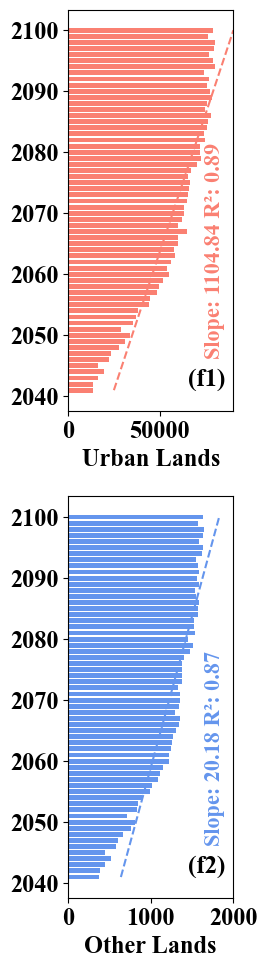

In [43]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('exposures_SSP585_2041_to_2100.csv')

# Create a figure and two subplots (in two rows and one column)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 10))

# Define a function to plot the data, regression line and statistics
def plot_data_and_regression(ax, x, y, color, xlabel):
    ax.barh(x, y, color=color)
    ax.set_xlabel(xlabel, fontsize=17.5)

    # Fit the data with a linear regression
    p = np.polyfit(x, y, 1)
    r = OLS(y, add_constant(x)).fit().rsquared

    # Plot the regression line with dashed linestyle
    ax.plot(np.polyval(p, x), x, color=color, linestyle='dashed')

    # Add text with the regression statistics
    ax.text(0.83, 0.13, f'Slope: {p[0]:.2f} R²: {r:.2f}',
            transform=ax.transAxes, ha='left', va='bottom', fontsize=16, color=color, rotation='vertical')
    
    # Adjust the horizontal axis to display values from 0 to 150,000 for ax1 and 0 to 3,000 for ax2
    ax1.set_xlim(0, 90000)
    ax2.set_xlim(0, 2000)

    # Set x-axis ticks to display only 2070, 2080, 2090, and 2100
    ax.set_yticks([2040, 2050, 2060, 2070, 2080, 2090, 2100])
    ax.set_yticklabels([2040, 2050, 2060, 2070, 2080, 2090, 2100])

# Plot the "Urban Lands" data in the first subplot
plot_data_and_regression(ax1, df['Year'], df['Urban Lands'], 'salmon', 'Urban Lands')
ax1.text(0.95, 0.05, "(f1)", transform=ax1.transAxes, ha='right', va='bottom', fontsize=18)

# Plot the "Other Lands" data in the second subplot
plot_data_and_regression(ax2, df['Year'], df['Other Lands'], 'cornflowerblue', 'Other Lands')
ax2.text(0.95, 0.05, "(f2)", transform=ax2.transAxes, ha='right', va='bottom', fontsize=18)

plt.tight_layout()  # Adjust the layout so that plots do not overlap
plt.savefig('040lucc-SSP585_2041_to_2100.png', dpi=400)
plt.show()


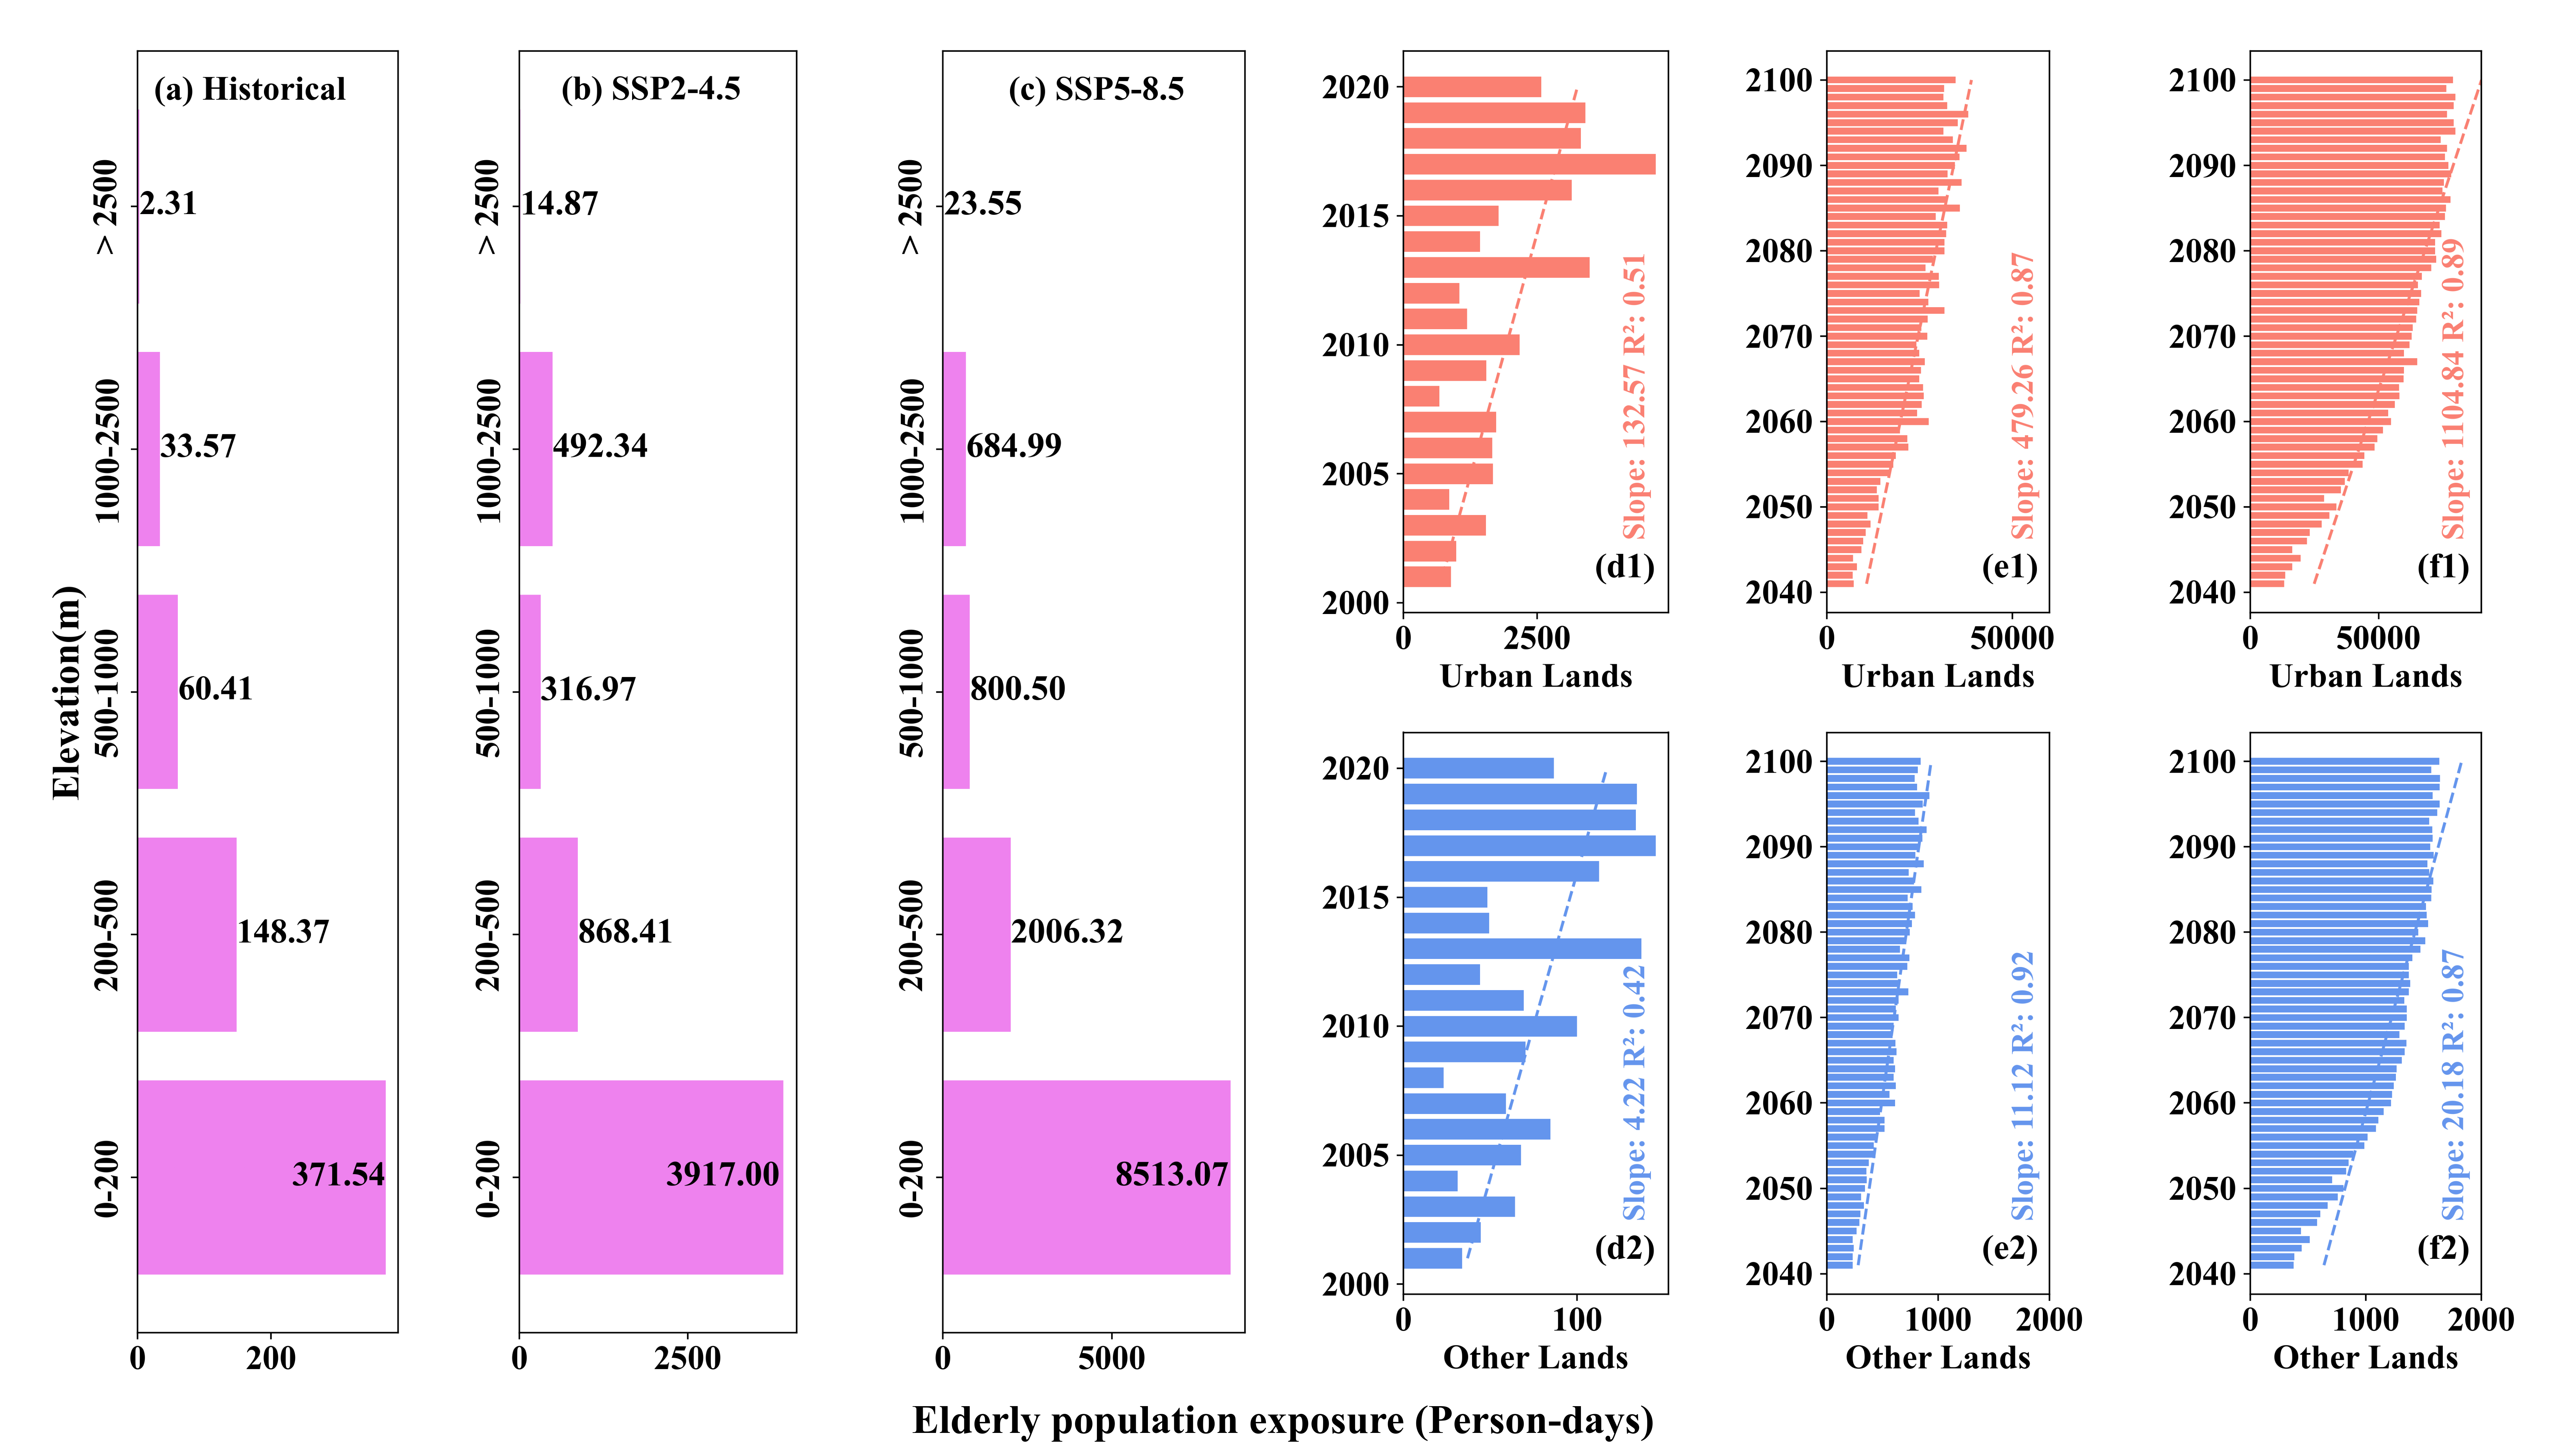

In [47]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image1 = mpimg.imread('010dem.png')
image2 = mpimg.imread('020dem.png')
image3 = mpimg.imread('030dem.png')
image4 = mpimg.imread('040lucc.png')
image5 = mpimg.imread('040lucc-SSP245_2041_to_2100.png')
image6 = mpimg.imread('040lucc-SSP585_2041_to_2100.png')

plt.figure(figsize=(17.3, 10), dpi=400)
plt.figure(1)

plt.subplot(161)  # 将图像区域分割为2行2列，选中第一个区域
plt.axis('off')
plt.imshow(image1)

plt.subplot(162)
plt.axis('off')
plt.imshow(image2)

plt.subplot(163)
plt.axis('off')
plt.imshow(image3)

plt.subplot(164)
plt.axis('off')
plt.imshow(image4)

plt.subplot(165)
plt.axis('off')
plt.imshow(image5)

plt.subplot(166)
plt.axis('off')
plt.imshow(image6)

plt.tight_layout(pad=0.001, h_pad=0.1, w_pad=0.1)

# 在图像底部添加文本
plt.text(0.5, 0.01, 'Elderly population exposure (Person-days)', transform=plt.gcf().transFigure, ha='center',fontsize=20)

plt.savefig("001 exposure-change.jpg", dpi=400)
